In [20]:
from pyepo.data import knapsack, dataset
from pyepo.func import SPOPlus
from pyepo.model.grb.knapsack import knapsackModel
from torch.utils.data import DataLoader
import torch
import numpy as np

from predmodel import ValueModel

weights, feats, costs = knapsack.genData(num_data=1, num_features=10, num_items=5)

optmodel = knapsackModel(weights=weights, capacity=12)
spo = SPOPlus(optmodel, processes=2)

dataset = dataset.optDataset(model=optmodel, feats=feats, costs=costs)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

alpha_options = np.arange(-5, 15.1, 0.05)

losses = []
gradients = []

for data in dataloader:
    x, c, w, z = data
    x = torch.reshape(x, (2, 5))

    for alpha in alpha_options:
        predmodel = ValueModel(alpha=alpha)
        cp = predmodel.forward(x)
        loss = spo(cp, c, w, z)
        losses.append(loss.detach())
        loss.backward()
        gradients.append(predmodel.alpha.grad.view(-1))

print(losses)

Num of cores: 2
Optimizing for optDataset...


100%|██████████| 1/1 [00:00<00:00, 2394.01it/s]


[tensor(45.6786), tensor(45.3489), tensor(45.0192), tensor(44.6895), tensor(44.3598), tensor(44.0301), tensor(43.7004), tensor(43.3707), tensor(43.0410), tensor(42.7113), tensor(42.3816), tensor(42.0519), tensor(41.7222), tensor(41.3925), tensor(41.0628), tensor(40.7331), tensor(40.4034), tensor(40.0737), tensor(39.7440), tensor(39.4143), tensor(39.0846), tensor(38.7549), tensor(38.4252), tensor(38.0955), tensor(37.7658), tensor(37.4361), tensor(37.1064), tensor(36.7767), tensor(36.4470), tensor(36.1173), tensor(35.7876), tensor(35.4579), tensor(35.1282), tensor(34.7985), tensor(34.4688), tensor(34.1391), tensor(33.8094), tensor(33.4797), tensor(33.1500), tensor(32.8203), tensor(32.4906), tensor(32.1609), tensor(31.8312), tensor(31.5015), tensor(31.1718), tensor(30.8421), tensor(30.5124), tensor(30.1827), tensor(29.8530), tensor(29.5233), tensor(29.1936), tensor(28.8639), tensor(28.5342), tensor(28.2045), tensor(27.8748), tensor(27.5451), tensor(27.2154), tensor(26.8857), tensor(26.556

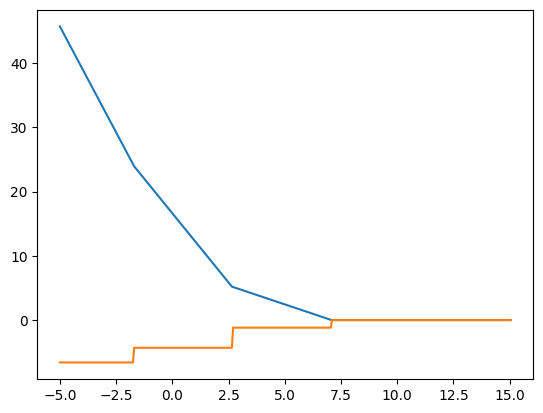

In [21]:
from matplotlib import pyplot as plt

plt.plot(alpha_options, losses)
plt.plot(alpha_options, gradients)

In [22]:
gradients

[tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
 tensor([-6.5940]),
